In [38]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [34]:


'''------------------------------------ Data Path ----------------------------------------------------'''
File = "madras_2021_0_5m_911_6.csv"
Data_path = "C:/Users/tjmor/Documents/Local_Data/Oregon_Xanthomonas/"

'''--------------------------------------- Load Data ----------------------------------------------------'''
df1 = pd.read_csv(Data_path+File,skiprows=13)
'''----------------------------------- Convert Excel Time ----------------------------------------------------'''
df1['Time'] = pd.TimedeltaIndex(df1['OADateTime'], unit='d') + dt.datetime(1899,12,30)
'''----------------------------------- Select Time Subset ----------------------------------------------------'''
df1 = df1.set_index('Time')
df1 = df1.loc['2021-09-04 18:00:00':]


<ipython-input-34-2398e16261b1>:15: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df1 = df1.loc['2021-09-04 18:00:00':]


In [48]:
time = np.array(df1.index)

Time = []
for i in range(len(time)):
    Time.append(str(time[i])[11:19])


In [50]:
print(time)

['2021-09-04T18:00:00.461980800' '2021-09-04T18:00:01.463011200'
 '2021-09-04T18:00:02.464992000' ... '2021-09-05T00:27:05.570035200'
 '2021-09-05T00:27:06.563980800' '2021-09-05T00:27:07.575033600']


In [ ]:
# Pre-process the data
'''---------------------------------------------- FIGURE 1: Plot rolling means ------------------------------------------------------'''
ymax = 1500
#Figure 1 ~ PM1, PM2.5, and PM10
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 10))

ax1.plot(Time, df1['RollMean_PM1'])
ax1.set(ylabel = r'PM1 [$\mu$g/m$^3$]')
ax1.grid(b=bool, which='major', axis='both')
ax1.autoscale(enable=True, axis='x', tight=True)
#ax1.set_ylim(0, 20)
ax1.legend(['SEOPC','SWOPC'])

ax2.plot(Time, df1['RollMean_PM2.5'])
ax2.set(ylabel = r'PM2.5 [$\mu$g/m$^3$]')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)
#ax2.set_ylim(0, 30)

ax3.plot(Time, df1['RollMean_PM10'])
ax3.set(ylabel = r'PM10 [$\mu$g/m$^3$]')
ax3.grid(b=bool, which='major', axis='both')
ax3.autoscale(enable=True, axis='x', tight=True)
#ax3.set_ylim(0, 50)

plt.minorticks_on()
#save figure
#plt.savefig('../gen/' + Figure_Name +'.png', bbox_inches='tight')

Lower Boundary 
Bin low boundary (particle diameter [um])	0.35	0.46	0.66	1	1.3	1.7	2.3	3	4	5.2	6.5	8	10	12	14	16	18	20	22	25	28	31	34	37	40																				


In [249]:
'''------------------------------------Caclulate Bin Count Rolling Mean-------------------------------------------'''
# Set our bins
PM1 = df1['Bin00']+df1['Bin01']+df1['Bin02']
PM1_3 = df1['Bin03']+df1['Bin04']+df1['Bin05']+df1['Bin06']
PM3_10 = df1['Bin07']+df1['Bin08']+df1['Bin09']+df1['Bin10']+df1['Bin11']
PM10_40 = df1['Bin12']+df1['Bin13']+df1['Bin14']+df1['Bin15']+df1['Bin16']+df1['Bin17']+df1['Bin18']+df1['Bin19']+df1['Bin20']+df1['Bin21']+df1['Bin22']+df1['Bin23']

PM1_cum = PM1
PM3_cum = PM1+PM1_3
PM10_cum = PM1+PM1_3+PM3_10
PM40_cum = PM1+PM1_3+PM3_10+PM10_40

'''------------------------------------Caclulate Bin Count Rolling Mean-------------------------------------------'''
PM1_roll = PM1.rolling(60).mean()
PM1_3_roll = PM1_3.rolling(60).mean()
PM3_10_roll = PM3_10.rolling(60).mean()
PM10_40_roll = PM10_40.rolling(60).mean()

#plt.plot(PM1)
#print(PM10_40.tail)



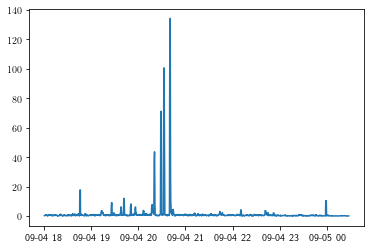

In [289]:
plt.plot(PM3_10_roll)